# Bank Personal Loan Modelling
Project by Muhammad Farras Rizki

### Latar Belakang
Dataframe ini milik sebuah bank bernama Thera Bank. Manajemen Thera Bank ingin membuat para nasabah untuk menggunakan jasa pinjaman pribadi dari bank (dengan tetap mempertahankan mereka sebagai deposan). Tahun lalu telah didakan sebuah kampanye yang membuat para nasabah (deposan) Thera Bank menggunakan jasa pinjaman pribadi, dengan tingkat keberhasilan 9%. Hal ini mendorong departemen pemasaran ritel untuk merancang kampanye dengan target pemasaran yang lebih baik untuk meningkatkan rasio keberhasilan dengan anggaran yang minimal.

### Tentang Dataframe
Dataframe `bank` berisi data 5000 nasabah. Data tersebut meliputi informasi demografis nasabah (umur, pendapatan, dll), hubungan nasabah dengan bank (hipotek, rekening, surat berharga, dll), dan respon nasabah terhadap kampanye pinjaman pribadi sebelumnya (`Personal Loan`). Di antara 5000 nasabah ini, hanya 480 (= 9,6%) yang menggunakan jasa pinjaman pribadi yang ditawarkan kepada mereka pada kampanye sebelumnya.

### Tujuan Proyek
- Menemukan insight dari Dataframe `bank` untuk diubah menjadi ide bisnis
- Membuat pemodelan untuk memprediksi minat nasabah dalam menggunakan jasa pinjaman pribadi


### Dataset diambil dari mana
Sumber: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling


### Deskripsi singkat akan pemodelan yang digunakan
Tujuan dari pemodelan adalah ingin membuat model yang mampu memprediksi minat seorang nasabah dalam menggunakan jasa pinjaman pribadi. Target Variabel yang akan digunakan adalah `Personal Loan` (respon nasabah terhadap kampanye pinjaman pribadi sebelumnya). Variabel yang paling diinginkan untuk optimal adalah **Recall**, karena ingin meminimalisir kesalahan prediksi pada nasabah yang sebenarnya ingin menggunakan jasa pinjaman.

Prediksi / Hipotesis yang dibuat berdasarkan target variabel :
- 0: Nasabah tidak berminat menggunakan jasa pinjaman pribadi (Negative)
- 1: Nasabah berminat menggunakan jasa pinjaman pribadi (Positive)
- False Positive: Diprediksi nasabah berminat menggunakan jasa pinjaman, Namun aktualnya nasabah tidak berminat menggunakan jasa pinjaman
- False Negative: Diprediksi nasabah tidak berminat menggunakan jasa pinjaman pribadi, Namun aktualnya nasabah berminat menggunakan jasa pinjaman

Model Machine Learning yang akan diuji antara lain:
1. Logical Regression
2. K-NN
3. Decision Tree Classification
4. Random Forest Classification

# Dara Preparation

## 1. Import Library

In [1]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

## 2. Import Dataset

In [2]:
# Import Dataset
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

## 3. Data Inspection

In [3]:
# Cek Dataframe
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Cek Dataframe information
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Konklusi :
- Dataframe terdiri dari 5000 baris dan 13 kolom
- 1 baris data merepresentasikan 1 ID nasabah yang telah mendapatkan penawaran pinjaman bank
- Pada dataframe `bank` tidak terdapat missing values 
- Semua kolom memiliki tipe data numeric, baik integer maupun float

In [5]:
# Cek duplikasi pada Dataframe
bank.duplicated().sum()

0

Nilai penjumlahan data duplikat adalah 0. Maka, dapat disimpulkan bahwa Dataframe `Bank` tidak data yang duplikat. 

In [6]:
# Cek unique values pada Dataframe
for x in bank.columns : 
    print (f'===== {x} =====')
    print (f'{bank[x].unique()}')
    print()

===== ID =====
[   1    2    3 ... 4998 4999 5000]

===== Age =====
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

===== Experience =====
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

===== Income =====
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 1

Konklusi :
- Kolom `ID` dan `ZIP Code` akan dihapus karena terlalu banyak unique values, sehingga tidak akan digunakan untuk EDA
- Pada kolom `Experience` terdapat data dengan nilai negative (-) yang mana nilai dari kolom `Experience` tidak boleh bernilai negative karena menyatakan lama pengalaman bekerja. Maka nilai tersebut akan dihapus

### 3.1 Data Cleansing

In [7]:
# Hapus kolom `ID` dan `ZIP Code` 
bank.drop(['ID','ZIP Code'], axis = 'columns', inplace = True)

In [8]:
# Hapus outliers pada kolom `Experience`
bank = bank[bank['Experience'] >= 0]  

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4948 non-null   int64  
 1   Experience          4948 non-null   int64  
 2   Income              4948 non-null   int64  
 3   Family              4948 non-null   int64  
 4   CCAvg               4948 non-null   float64
 5   Education           4948 non-null   int64  
 6   Mortgage            4948 non-null   int64  
 7   Personal Loan       4948 non-null   int64  
 8   Securities Account  4948 non-null   int64  
 9   CD Account          4948 non-null   int64  
 10  Online              4948 non-null   int64  
 11  CreditCard          4948 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 502.5 KB


Konklusi :
- Setelah dilakukan data cleansing, dataframe `bank` memiliki 4948 baris data dan 12 kolom

# Exploratory Data Analysis
## 4. Spliting Data Train dan Test

In [10]:
# Cek perbandingan target
target_var = bank['Personal Loan'].value_counts(normalize=True)

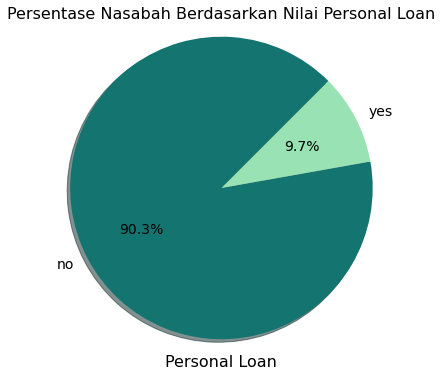

In [11]:
plt.figure(figsize=(6,6))

conversion_rate = target_var.index
count = target_var.values
colors= ['#14746F','#99E2B4']

plt.pie(count, labels=['no','yes'],
        shadow=True,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        textprops={'fontsize': 14})

plt.title('Persentase Nasabah Berdasarkan Nilai Personal Loan',fontsize=16)
plt.xlabel('Personal Loan',fontsize=16)
plt.axis('equal')
plt.show()

Konklusi :
- 9.7% Nasabah menggunakan pinjaman pribadi yang ditawarkan oleh bank
- 90.3% Nasabah tidak menggunakan pinjaman pribadi yang ditawarkan oleh bank

In [12]:
# Stratify --> imbalance data (target variabel)

X = bank.drop('Personal Loan',axis=1).copy()
y = bank['Personal Loan'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [13]:
# Insert 'Personal Loan' pada X_train dan X_test untuk memudahkan analisis
X_train['Personal Loan'] = y_train
X_test['Personal Loan'] = y_test

In [14]:
# Menghitung persentase data 'Personal Loan' pada X_train

round(((X_train['Personal Loan'].value_counts(normalize=True))*100),1)

0    90.3
1     9.7
Name: Personal Loan, dtype: float64

In [15]:
# Menghitung persentase data 'Personal Loan' pada X_test

round(((X_test['Personal Loan'].value_counts(normalize=True))*100),1)

0    90.3
1     9.7
Name: Personal Loan, dtype: float64

**Baik data Train maupun data Test memiliki jumlah perbandingan target variabel (Personal Loan) yang sama yaitu 90.3 : 9.7**

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711 entries, 392 to 4390
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3711 non-null   int64  
 1   Experience          3711 non-null   int64  
 2   Income              3711 non-null   int64  
 3   Family              3711 non-null   int64  
 4   CCAvg               3711 non-null   float64
 5   Education           3711 non-null   int64  
 6   Mortgage            3711 non-null   int64  
 7   Securities Account  3711 non-null   int64  
 8   CD Account          3711 non-null   int64  
 9   Online              3711 non-null   int64  
 10  CreditCard          3711 non-null   int64  
 11  Personal Loan       3711 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 376.9 KB


## 5. Descriptive Statistic

In [17]:
# Mengkategorikan kolom berdasarkan tipe datanya
categoricals = []
numericals = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']

In [18]:
# Numericals Statistical Summary
bank[numericals].describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obesrvasi:
- Nilai min dan max semua kolom normal / tidak ada anomali
- Kolom `Personal Loan`, `Securities Account`,  `CD Account`, `Online`, dan `CreditCard` merupakan kolom dengan tipe data boolean / binary
- Kolom `Age`, `Experience`, `Income`, `CCAvg` dan `Mortgage` merupakan kolom dengan tipe data interval kategori
- Kolom `Family` dan `Education` merupakan kolom dengan tipe data ordinal kategori
- Rata-rata nasabah yang mendapatkan penawaran pinjaman pribadi dari bank berumur 45 tahun
- Sedangkan rata-rata nasabah yang mendapatkan penawaran pinjaman pribadi dari bank memiliki lama pengalaman kerja 20 tahun dan memiliki pendapatan sebesar \\$73800 per tahun

## 6. Univariate Analysis
### 6.1 Cek Outliers
Mendeteksi adanya outliers menggunakan Boxplot

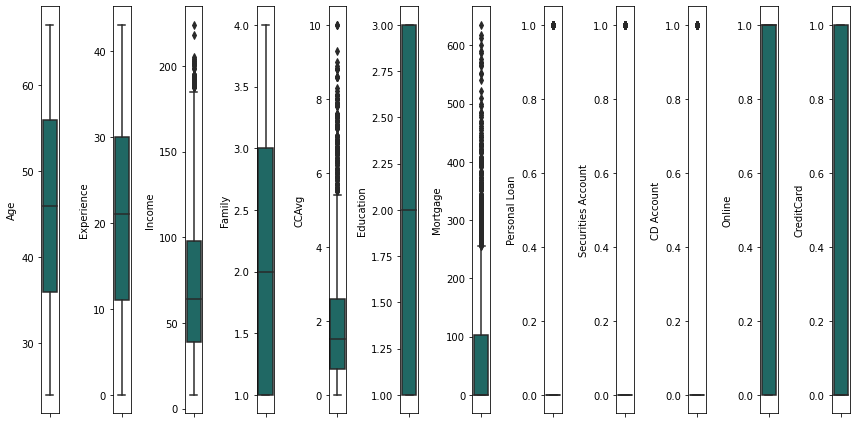

In [19]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=X_train[features[i]], color='#14746F')
    plt.tight_layout()

Observasi :

Dari Boxplot diatas dapat diketahui bahawa pada kolom `Income`,`CCAvg`,`Mortgage`,`Personal Loan`,`Securities Account`, dan `CD Account` terdapat data yang dicurigai sebagai outliers. Maka cek nilainya terlebih dahulu sebelum ditindak lanjuti

In [20]:
# Cek nilai outliers terjauh pada kolom `Income`
X_train_outlier = X_train.copy()
outlier = X_train_outlier['Income'].max()
X_train_outlier[X_train_outlier['Income'] == outlier]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
3896,48,24,224,2,6.67,1,0,0,1,1,1,0


In [21]:
# Cek nilai outliers terjauh pada kolom `CCAvg`
outlier = X_train_outlier['CCAvg'].max()
X_train_outlier[X_train_outlier['CCAvg'] == outlier]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
787,45,15,202,3,10.0,3,0,0,0,0,0,1
2337,43,16,201,1,10.0,2,0,0,0,0,1,1
2101,35,5,203,1,10.0,3,0,0,0,0,0,1


In [22]:
# Cek nilai outliers terjauh pada kolom `Mortgage`
outlier = X_train_outlier['Mortgage'].max()
X_train_outlier[X_train_outlier['Mortgage'] == outlier]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
2934,37,13,195,2,6.5,1,635,0,0,1,0,0


Konklusi:

- Pada kolom `Income` terdapat outliers dengan nilai terjauh sebesar 224. Hal ini memiliki arti bahwa pendapatan tahunan nasabah sebesar \\$224000 atau Rp.3.480.332.800, Maka outliers tidak perlu dihapus karena nilai tersebut masih tergolong wajar dan memang benar adanya.
- Pada kolom `CCAvg` terdapat outliers dengan nilai terjauh sebesar 10. Hal ini memiliki arti bahwa pengeluaran rata-rata untuk kartu kredit per bulan nasabah sebesar \\$10000 atau Rp.155.372.000, Maka tidak perlu dihapus karena nilai tersebut masih tergolong wajar dan memang benar adanya.
- Pada kolom `Mortgage` terdapat outliers dengan nilai terjauh sebesar 635. Hal ini memiliki arti bahwa nasabah memiliki cicilan KPR rumah sebesar \\$635000 atau Rp.9.866.122.000, Maka tidak perlu dihapus karena nilai tersebut masih tergolong wajar dan memang benar adanya.
- Untuk outlier pada kolom `Personal Loan`, `Securities Account`, dan `CD Account` dapat diabaikan karena kolom tersebut merupakan kolom boolean / binary

### 6.2 Cek Distribution
Cek distribusi tiap kolom menggunakan KDE plot

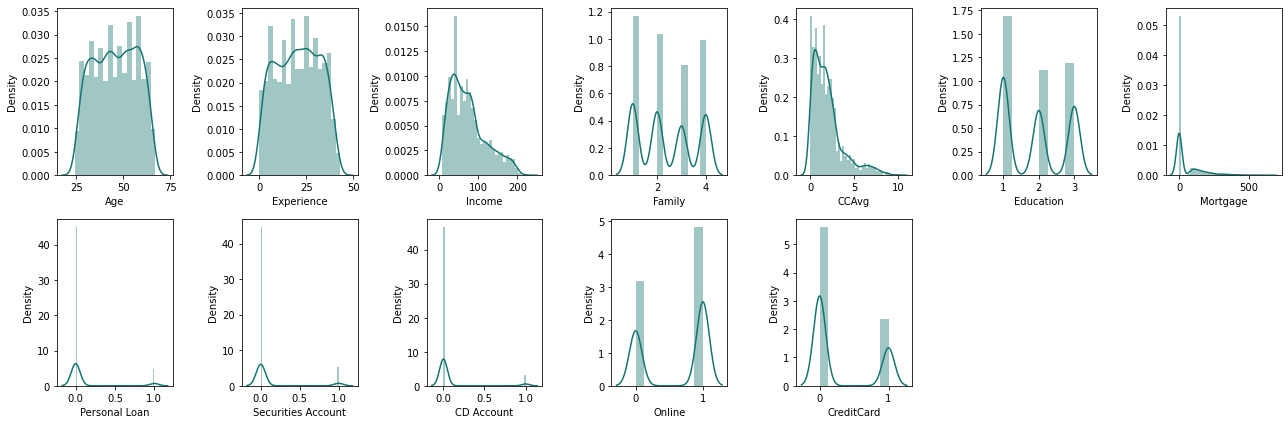

In [23]:
plt.figure(figsize=(18,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=X_train[features[i]], color='#14746F')
    plt.xlabel(features[i])
    plt.tight_layout()

Observasi:

- Pada kolom `Age`, `Experience` bentuk grafik sucah cukup simetris.
- Pada kolom `Income`, `CCAvg`, dan `Mortgage` bentuk grafik tidak simetris (positive skew), maka jika ingin melanjutkan ke pembuatan machine learning, perlu dilakukan log transformasi.
- Pada kolom `Personal Loan`, `Securities Account`, `CD Account`, dan `CreditCard` memiliki distribusi frekuensi data yang tidak seimbang, dengan jumlah data 0 jauh lebih banyak dibandingkan 1.
- Sedangkan pada kolom `Online` nilai tidak seimbang namun tidak cukup ekstrem, jumlah nilai 1 lebih banyak daripada nilai 0.
- Untuk kolom `Family`, dan `Education` dapat diabaikan karena memiliki nilai diskrit yang terbatas

## 7. Multivariate Analysis
Menggunakan Correlation heatmap dan Pairplot untuk mencari hubungan/korelasi antar variabel
### 7.1 Correlation heatmap

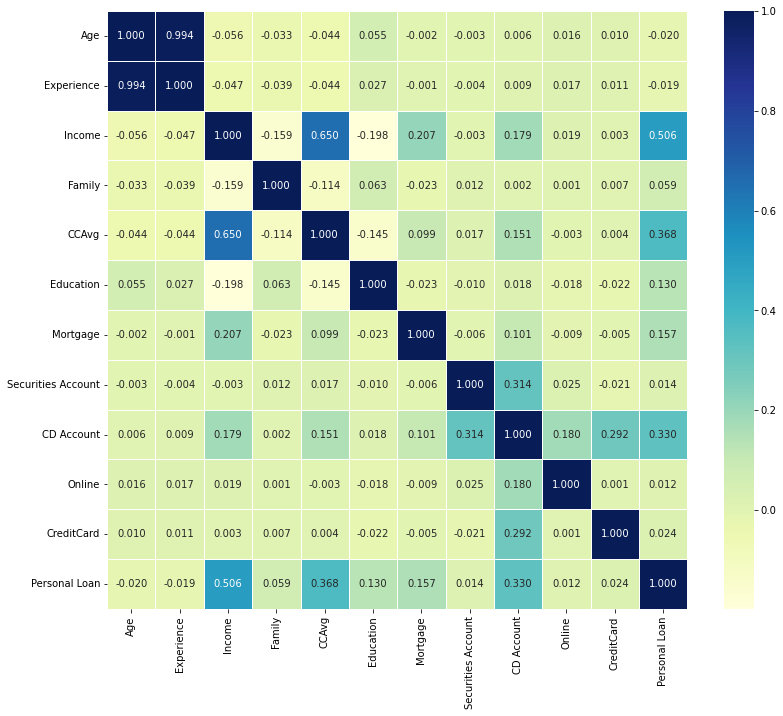

In [24]:
fig, ax = plt.subplots(figsize = (13, 11))
sns.heatmap(X_train.corr(),cbar=True,annot=True,linewidths=0.5,ax=ax,fmt='.3f',cmap="YlGnBu")
plt.show()

Observasi:
- Feature `Age` dan `Experience` memiliki korelasi yang paling tinggi (0.99). Maka, semakin tua usia customer maka akan semakin lama pula pengalaman kerjanya.
- Terdapat beberapa Feature yang saling tidak berkorelasi, salah satunya adalah `Securities Account` dan `Age` dengan korelasi sebesar 0.00. Maka, dapat disimpulkan bahwa kedua feature tersebut benar-benar tidak saling mempengaruhi.
- Feature yang memiliki koreklasi yang paling tinggi dengan target variabel (`Personal Loan`) adalah `Income`, yaitu sebesar 0.504
- Sedangkan, feature yang paling tidak berkorelasi dengan target variabel adalah `CreditCard` dengan nilai korelasi sebesar 0.003

### 7.2 Pairplot

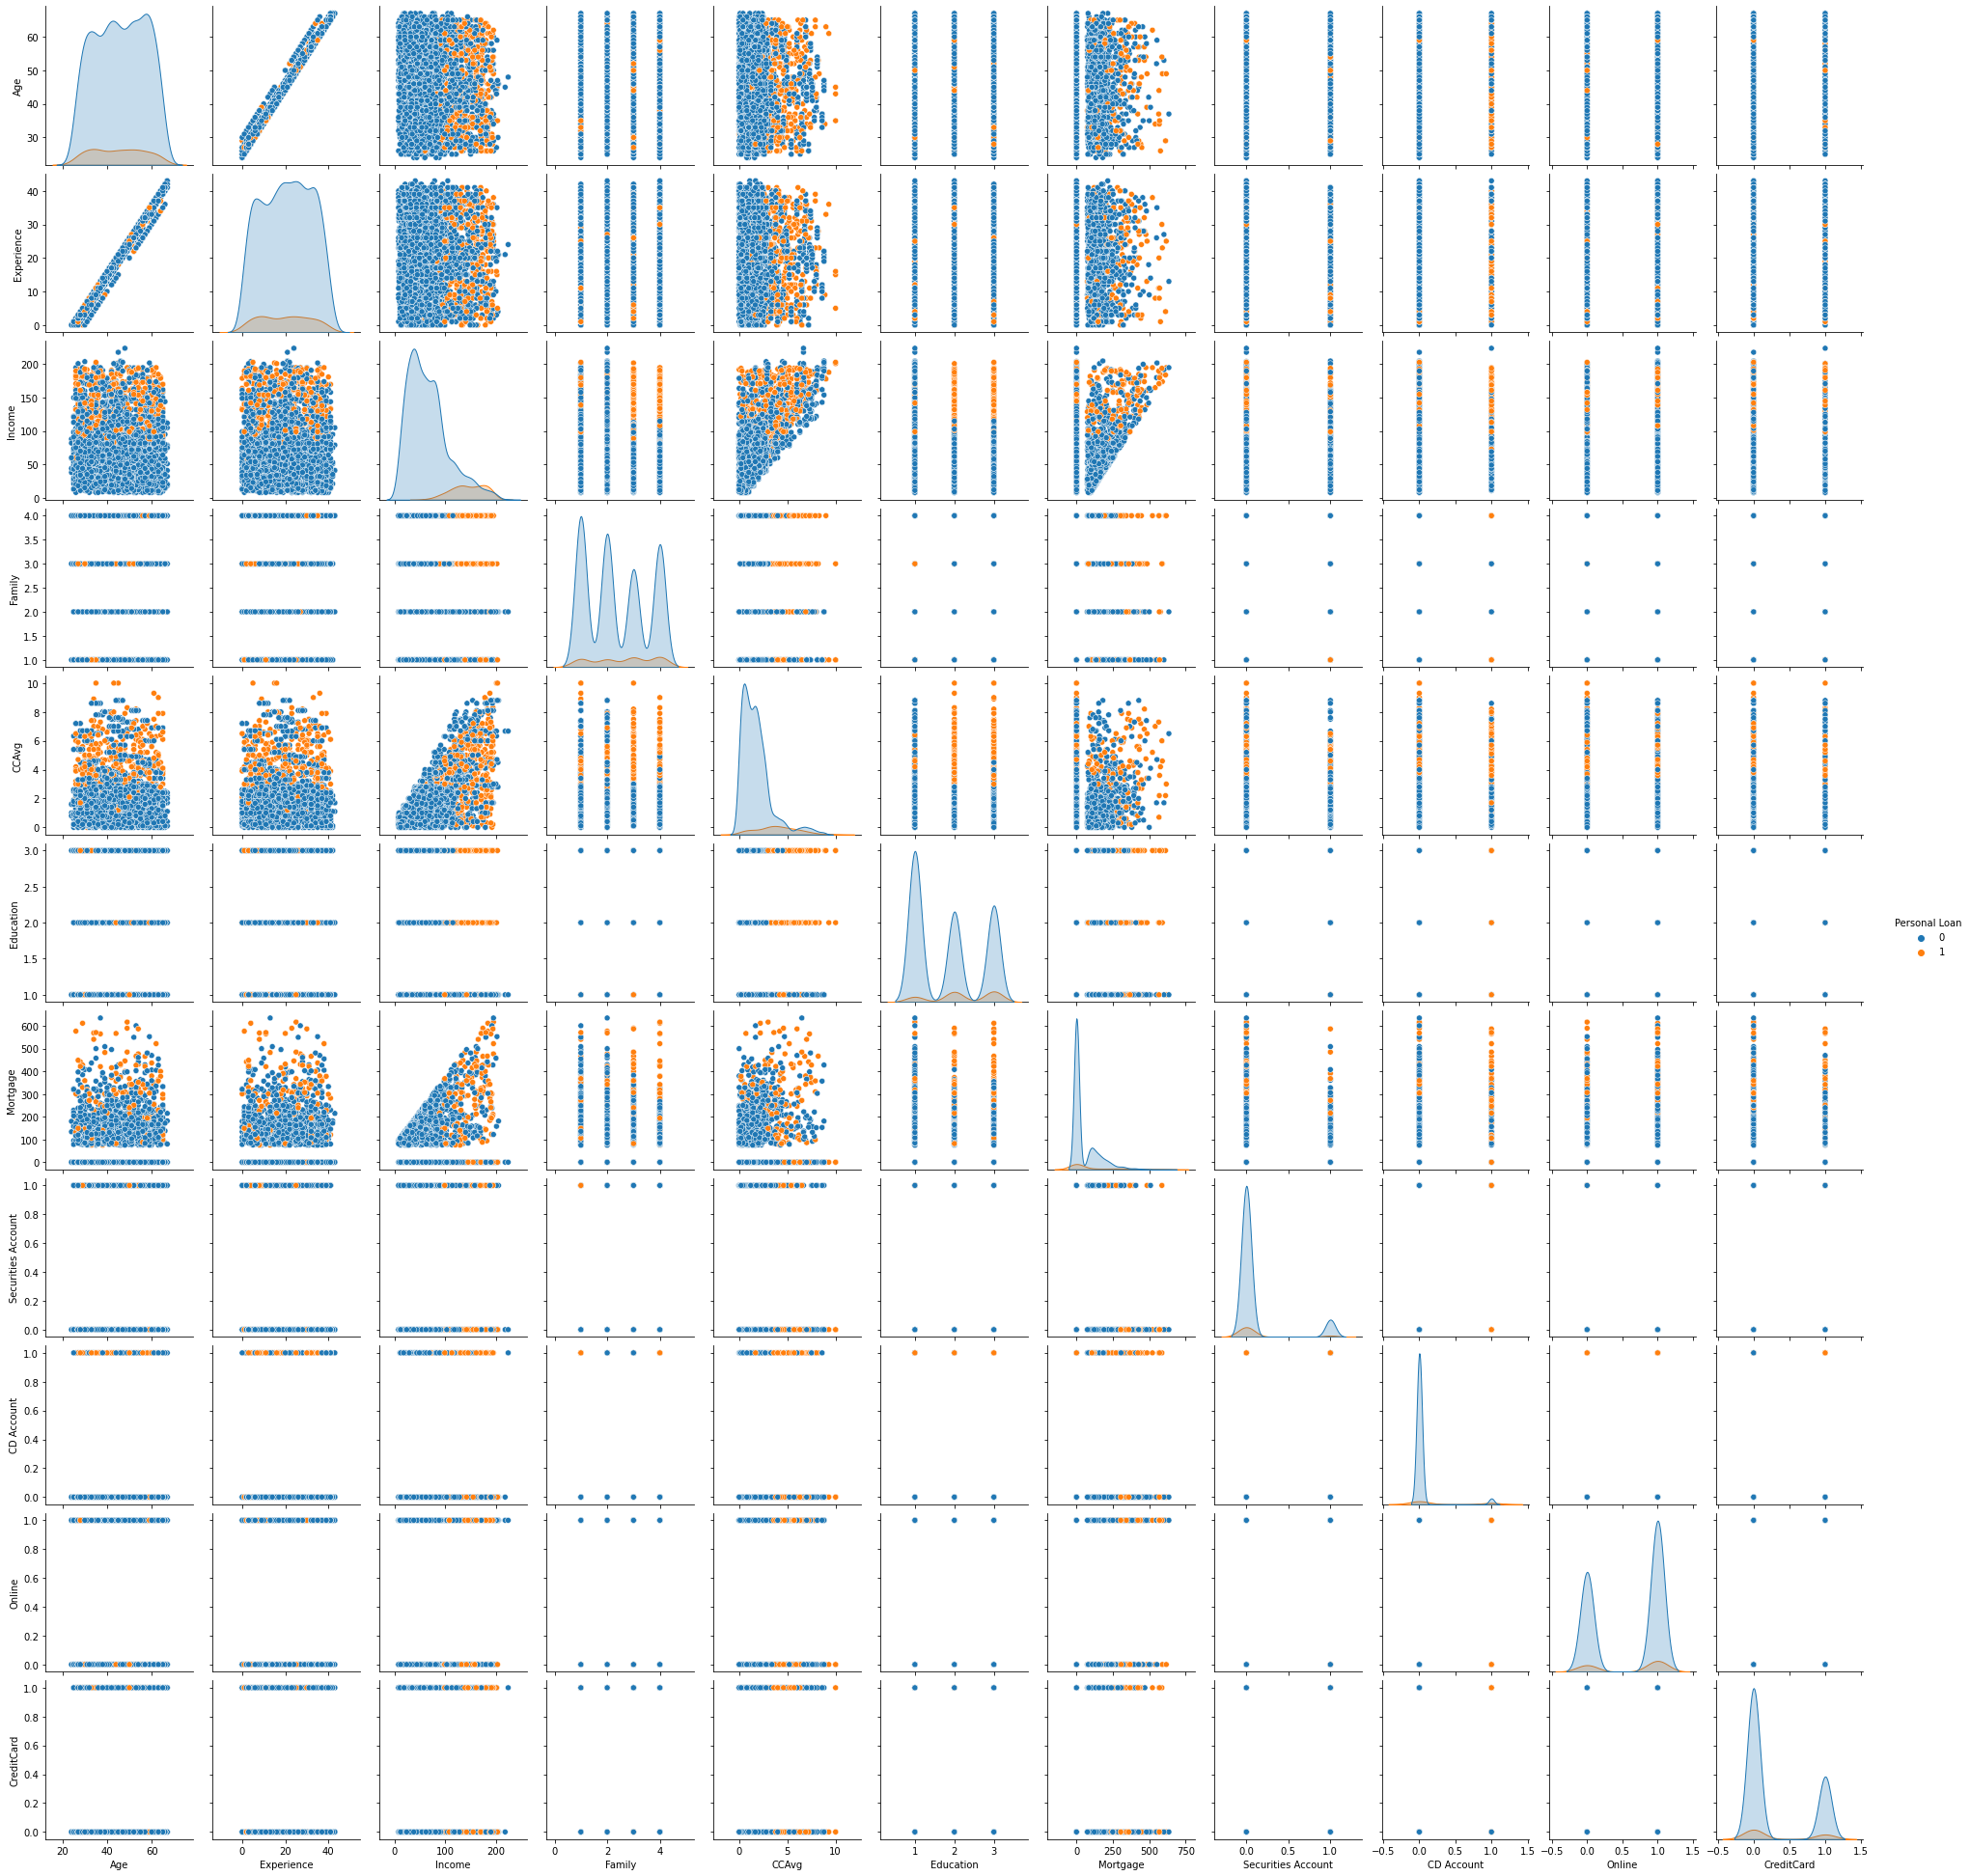

In [25]:
sns.pairplot(X_train, hue='Personal Loan')
plt.show()

Observasi :

Karena grafik pada pairplot terlalu banyak, maka akan dipilih beberapa feature yang memiliki pola paling jelas terhadap target variabel (`Personal Loan`)

#### 1. Kolom **`Income`** dan **`Age`** terhadap **`Personal Loan`**

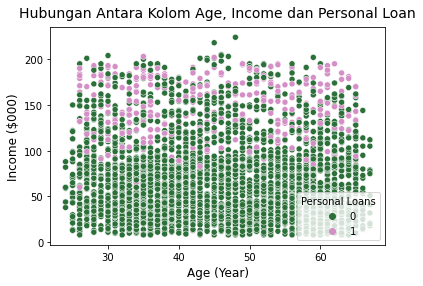

In [26]:
plt.title('Hubungan Antara Kolom Age, Income dan Personal Loan', fontsize=14, pad=10)
sns.scatterplot(x = 'Age', y = 'Income', data = X_train, hue = 'Personal Loan', palette="cubehelix")
plt.xlabel('Age (Year)', fontsize = 12)
plt.ylabel('Income ($000)', fontsize = 12)
plt.legend(loc='lower right', title='Personal Loans')
plt.show()

Observasi :

Dari diagram scatterplot dapat dikatakan bahwa, nasabah dengan pendapatan tahunan lebih dari \\$100000 lebih sering menggunakan jasa pinjaman pribadi, jika dibandingkan nasabah dengan pendapatan tahunan kurang dari \\$100000. Karena diagram belum menunjukan pola yang jelas, maka untuk memastikan pernyataan dapat dilakukan pengecekan pada Deep Dive Question.

#### 2. Kolom **`Income`** dan **`Education`** terhadap **`Personal Loan`**

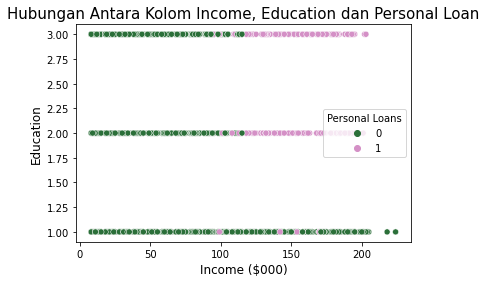

In [27]:
plt.title('Hubungan Antara Kolom Income, Education dan Personal Loan', fontsize=15)
sns.scatterplot(y = 'Education', x = 'Income', data = X_train, hue = 'Personal Loan', palette="cubehelix")
plt.ylabel('Education', fontsize = 12)
plt.xlabel('Income ($000)', fontsize = 12)
plt.legend(loc='right', title='Personal Loans')
plt.show()

Observasi :

Dari diagram scatterplot dapat dikatakan bahwa, nasabah yang memiliki gelar pendidikan S2 maupun S3 dengan pendapatan tahunan lebih dari $100000 lebih sering menggunakan jasa pinjaman pribadi.

#### 3. Kolom **`CCAvg`** dan **`Family`** terhadap **`Personal Loan`**

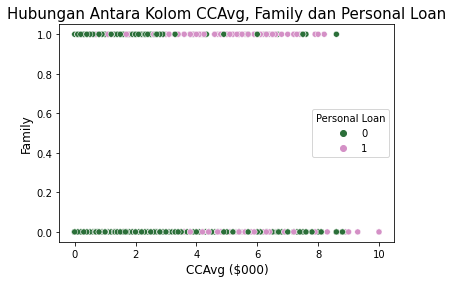

In [28]:
plt.title('Hubungan Antara Kolom CCAvg, Family dan Personal Loan', fontsize=15)
sns.scatterplot(x = 'CCAvg', y = 'CD Account', data = X_train, hue = 'Personal Loan', palette="cubehelix")
plt.ylabel('Family', fontsize = 12)
plt.xlabel('CCAvg ($000)', fontsize = 12)
plt.show()

Observasi :

Dari diagram scatterplot dapat dikatakan bahwa, nasabah dengan jumlah anggota keluarga sekaligus pengeluaran kartu kredit yang besar lebih sering menggunakan jasa pinjaman pribadi.

## 8. Deep Dive Question

In [29]:
# Buat dataframe baru khusus untuk Deep Dive Question
bank_ddq = bank.copy()

### 8.1. Bagaimana pengaruh income pada minat nasabah dalam menggunakan jasa pinjaman

In [30]:
## Income Encoding
def inc_class(x):
    if x < 50:
        return '0-50'
    elif x < 100:
        return '50-100'
    elif x < 150:
        return '100-150'
    elif x < 200:
        return '150-200'
    else:
        return '200 Above'
    
bank_ddq['Income'] = np.vectorize(inc_class)(bank_ddq['Income'])

In [31]:
## Agregasi data 'Personal Loan'

# Total nasabah yang menggunakan jasa pinjaman berdasarkan pendapatan tahunan
income_approve_loan = (bank_ddq
                    .groupby('Income')
                    .agg(loan_yes=('Personal Loan','sum'))
                    .reset_index())

# Total nasabah yang ditawari jasa pinjaman berdasarkan pendapatan tahunan
income_all_loan = (bank_ddq
                .groupby('Income')
                .agg(offer_loan=('Personal Loan','count'))
                .reset_index())

In [32]:
# Gabungkan tabel
income_loan_merge = pd.merge(income_approve_loan, income_all_loan, on='Income', how='outer')

In [33]:
# Cari nilai approve loan dalam persen
income_loan_merge['probability_approve(%)'] = (income_loan_merge['loan_yes'] / income_loan_merge['offer_loan'])*100
income_sort = income_loan_merge.sort_values('probability_approve(%)',ascending=False)
income_sort

,Income,loan_yes,offer_loan,probability_approve(%)
2,150-200,217,433,50.115473
1,100-150,219,757,28.929987
3,200 Above,3,19,15.789474
4,50-100,41,1889,2.170461
0,0-50,0,1850,0.000000


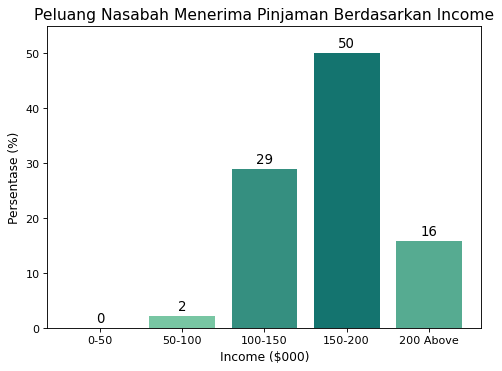

In [34]:
# Visualisasi

income_visual = income_sort.reindex([0,4,1,2,3])  
y = income_visual['probability_approve(%)']
x = income_visual['Income']
list_color = ['#99E2B4', '#78C6A3', '#358F80', '#14746F', '#56AB91']

figure(figsize=(7, 5), dpi=80)
plt.bar(x,y,  color=list_color)
plt.ylim(0,55)
plt.xlabel('Income ($000)',fontsize=11)
plt.ylabel('Persentase (%)',fontsize=11)
plt.title('Peluang Nasabah Menerima Pinjaman Berdasarkan Income',fontsize=14)

for i in range(len(x)):
    plt.text(x=x[i],y=y[i]+1,s=("%.0f" % y[i]),
            ha='center', fontsize=12)

plt.show()

Konklusi :

Dari graik diatas, dapat disimpulkan bahwa nasabah dengan pendapatan tahunan antara \\$150000 - \$200000 memiliki peluang (%) tertinggi dalam menerima tawaran jasa pinjaman pribadi, dengan nilai 50,11%

### 8.2. Nasabah dengan spending credit card seperti apa yang tidak berminat menggunakan jasa pinjaman ?

In [35]:
# Split data berdasarkan `Personal Loan`
loan_yes = bank_ddq[bank_ddq['Personal Loan'] == 1]
loan_no = bank_ddq[bank_ddq['Personal Loan'] == 0]

In [36]:
## CCAvg Encoding
def ccavg_class(x):
    if x < 2:
        return '0-2'
    elif x < 4:
        return '2-4'
    elif x < 6:
        return '4-6'
    elif x < 8:
        return '8-6'
    else:
        return '8-10'
    
loan_no['CCAvg'] = np.vectorize(ccavg_class)(loan_no['CCAvg'])
bank_ddq['CCAvg'] = np.vectorize(ccavg_class)(bank_ddq['CCAvg'])

In [37]:
# Total nasabah berdasarkan rata-rata tagihan credit card, pada nasabah yang tidak menggunakan jasa pinjaman
ccavg_no = (loan_no
            .groupby('CCAvg')
            .agg(reject_loan=('Personal Loan','count'))
            .reset_index())

ccavg_total = (bank_ddq
            .groupby('CCAvg')
            .agg(offer_loan=('Personal Loan','count'))
            .reset_index())

In [38]:
# Gabungkan tabel
ccavg = pd.merge(ccavg_no, ccavg_total, on='CCAvg', how='outer')

In [39]:
# Cari nilai approve loan dalam persen
ccavg['probability_reject(%)'] = (ccavg['reject_loan'] / ccavg['offer_loan'])*100
ccavg_sort = ccavg.sort_values('probability_reject(%)',ascending=False)
ccavg_sort

,CCAvg,reject_loan,offer_loan,probability_reject(%)
0,0-2,2938,3030,96.963696
1,2-4,1180,1340,88.059701
4,8-6,144,211,68.246445
3,8-10,34,51,66.666667
2,4-6,172,316,54.430380


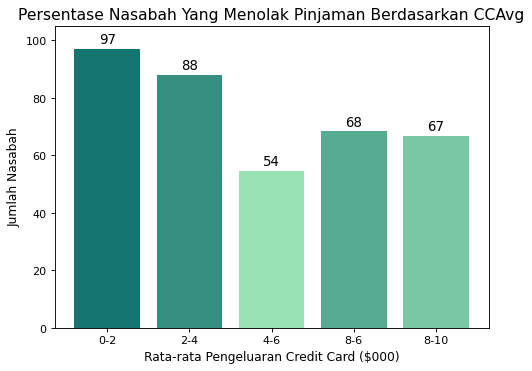

In [40]:
# Visualisasi

ccavg_visual = ccavg_sort.reindex([0,1,2,4,3])  
y = ccavg_visual['probability_reject(%)']
x = ccavg_visual['CCAvg']
list_color = ['#14746F', '#358F80', '#99E2B4', '#56AB91', '#78C6A3']



figure(figsize=(7, 5), dpi=80)
plt.bar(x,y,  color=list_color)
plt.ylim(0,105)
plt.xlabel('Rata-rata Pengeluaran Credit Card ($000)',fontsize=11)
plt.ylabel('Jumlah Nasabah',fontsize=11)
plt.title('Persentase Nasabah Yang Menolak Pinjaman Berdasarkan CCAvg',fontsize=14)

for i in range(len(x)):
    plt.text(x=x[i],y=y[i]+2,s=("%.0f" % y[i]),
            ha='center', fontsize=12)

plt.show()

Konklusi :

Dari graik diatas, dapat dinyatakan bahwa nasabah dengan rata-rata pengeluaran credit card sebesar \\$0 - \$2000 per bulan merupakan kategori dengan probabilitas tertinggi yang menolak tawaran jasa pinjaman pribadi, yaitu sebesar 97%.

### 8.3. Bagaimana hubungan antara CD Account dengan Personal Loan ?

In [41]:
## CD Encoding
def CD_encod(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'
    
loan_yes['CD Account'] = np.vectorize(CD_encod)(loan_yes['CD Account'])
loan_no['CD Account'] = np.vectorize(CD_encod)(loan_no['CD Account'])
bank_ddq['CD Account'] = np.vectorize(CD_encod)(bank_ddq['CD Account'])

In [42]:
cd_loan_no = (loan_no
            .groupby('CD Account')
            .agg(Loan_No=('Personal Loan','count'))
            .reset_index())

In [43]:
cd_loan_yes = (loan_yes
            .groupby('CD Account')
            .agg(Loan_yes=('Personal Loan','count'))
            .reset_index())

In [44]:
cd_loan_merge = pd.merge(cd_loan_no, cd_loan_yes, on='CD Account', how='outer')
cd_loan_merge

,CD Account,Loan_No,Loan_yes
0,No,4306,340
1,Yes,162,140


In [45]:
a = cd_loan_merge['Loan_yes']
b = cd_loan_merge['Loan_No']


cd_loan_merge['Proba_Yes(%)'] = (a / (a+b)*100)
cd_loan_merge

,CD Account,Loan_No,Loan_yes,Proba_Yes(%)
0,No,4306,340,7.318123
1,Yes,162,140,46.357616


In [46]:
cd_loan_merge['Offer_Loan'] = cd_loan_merge['Loan_No'] + cd_loan_merge['Loan_yes']
cd_loan_merge

,CD Account,Loan_No,Loan_yes,Proba_Yes(%),Offer_Loan
0,No,4306,340,7.318123,4646
1,Yes,162,140,46.357616,302


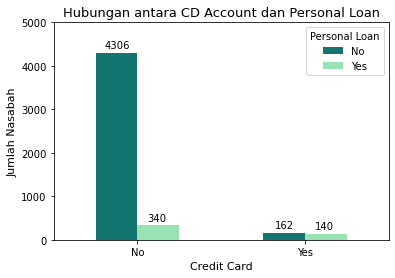

In [47]:
# Visualisasi CD Account dengan Personal Loan
(pd.crosstab(bank_ddq['CD Account'],bank_ddq['Personal Loan'])).plot(kind='bar',figsize=(6,4), color=['#14746F','#99E2B4'])
plt.xticks(rotation=0);
plt.ylabel('Jumlah Nasabah',fontsize=11)
plt.xlabel('Credit Card',fontsize=11)
plt.title('Hubungan antara CD Account dan Personal Loan',fontsize=13)
plt.ylim(0,5000)
plt.legend(title='Personal Loan', labels= ['No', 'Yes']);

plt.text(x = -0.12, y = 4400, s = "4306", ha='center')
plt.text(x = 0.115, y = 440, s = "340", ha='center')
plt.text(x = 0.88, y = 260, s = "162", ha='center')
plt.text(x = 1.12, y = 240, s = "140", ha='center')

plt.show()

Konklusi :

Dari analisa diatas, dapat disimpulkan bahwa nasabah yang memiliki Sertifikat Deposito memiliki peluang (%) yang lebih tinggi dalam menerima tawaran jasa pinjaman pribadi, dengan nilai 46,35%

# Data Preprocessing

## 9. Feature Selection

In [48]:
X_train_drop = X_train.copy()

In [49]:
X_train_drop = X_train_drop.drop('Personal Loan',axis=1)

In [50]:
mi = mutual_info_classif(X_train_drop, y_train,random_state=42)

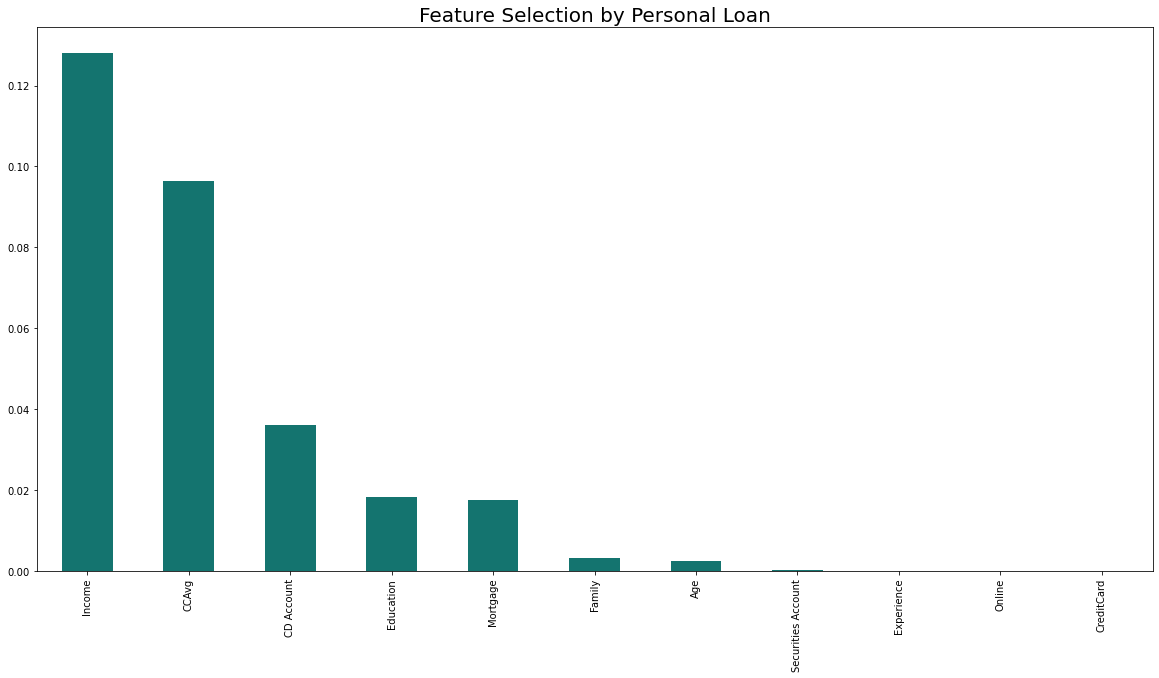

In [51]:
mi = pd.Series(mi)
mi.index = X_train_drop.columns
mi.sort_values(ascending=False).plot(kind='bar', figsize=(20,10), color=['#14746F'])
plt.title('Feature Selection by Personal Loan',fontsize=20)
plt.show()

Konklusi :

Feature `Experience`,`Online`, dan `Creditcard` memiliki korelasi yang sangat kecil dengan `Personal Loan`. Jika dilihat dari Correlation heatmap (7.1) nilai korelasi dari masing-masing feature terhadap `Personal Loan` adalah:
- `Experience` = 0,019
- `Online` = 0,012
- `Creditcard` = 0,024

Maka, ketiga feature tersebut dapat didrop untuk mengoptimalkan proses modeling

In [52]:
# Feature Selection - X_train
X_train_top8 = X_train_drop.drop(['Experience','Online','CreditCard'],axis=1)
X_train_top8.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
392,54,48,4,1.8,3,0,0,0
2151,41,19,2,0.3,2,105,0,0
4809,43,32,3,0.6,2,0,0,0
3361,31,85,3,1.6,1,87,0,0
2389,27,41,1,1.9,3,0,0,0


In [53]:
# Feature Selection - X_test
X_test_top8 = X_test.copy()
X_test_top8 = X_test_top8[X_train_top8.columns]
X_test_top8.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
914,65,195,3,0.4,1,0,1,1
1545,55,131,2,2.7,1,0,1,0
4173,35,43,2,0.3,1,0,0,0
4028,46,64,4,2.9,1,189,0,0
1481,35,179,2,0.0,1,76,1,0


## 10. Feature Transformation

In [54]:
# Pilih feature yang akan di log transform
feature_t = ['Income','CCAvg','Mortgage']

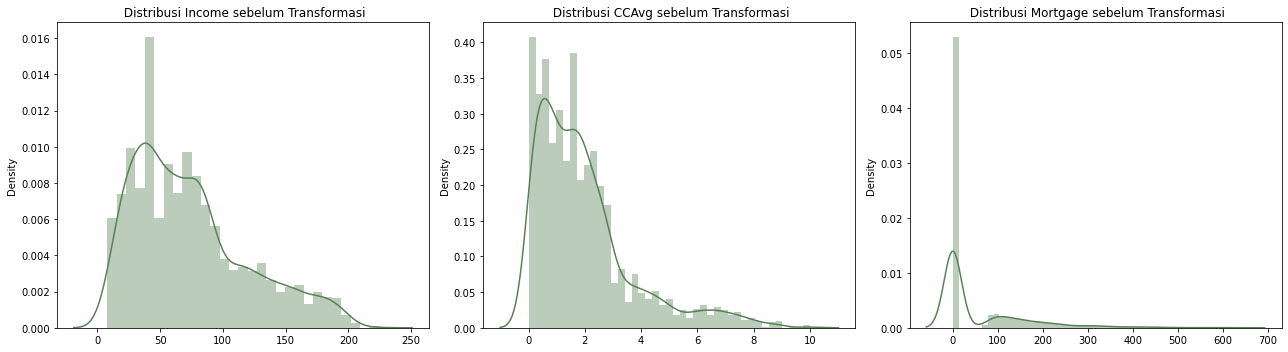

In [55]:
plt.figure(figsize=(18,5))

for x in range(0, len(feature_t)):
    plt.subplot(1, len(feature_t), x+1)
    sns.distplot(x=X_train_top8[feature_t[x]], color='#588157')
    plt.title(f' Distribusi {feature_t[x]} sebelum Transformasi')
    plt.tight_layout()

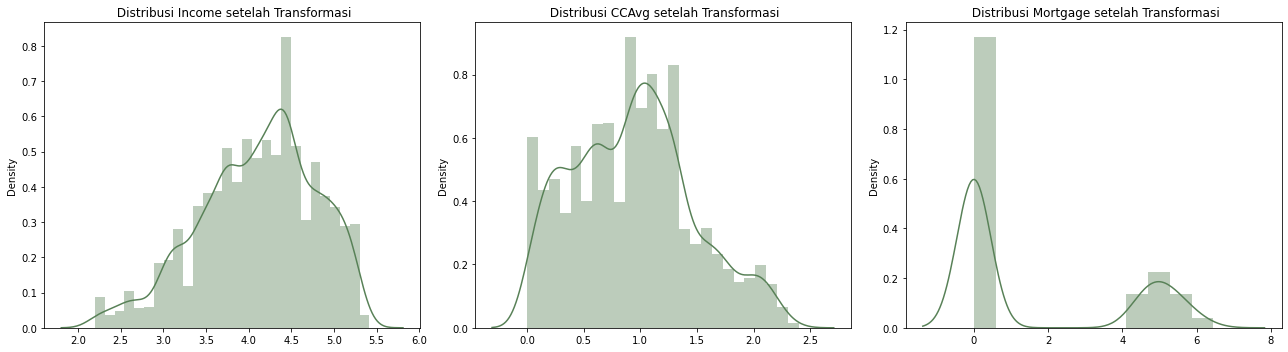

In [56]:
plt.figure(figsize=(18,5))

for x in range(0, len(feature_t)):
    plt.subplot(1, len(feature_t), x+1)
    sns.distplot(x=np.log1p(X_train_top8[feature_t[x]]), color='#588157')
    plt.title(f' Distribusi {feature_t[x]} setelah Transformasi')
    plt.tight_layout()

## 11. Feature Scaling
Menggunakan Standarisasi untuk feature scaling karena data terdistribusi normal, dan hanya akan digunakan pada Model k-Nearest Neighbors dan Logistic Regression

In [57]:
scaler = StandardScaler()

#### Data Training

In [58]:
X_train_top8_scale = X_train_top8.copy()

In [59]:
X_train_top8_scale.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
392,54,48,4,1.8,3,0,0,0
2151,41,19,2,0.3,2,105,0,0
4809,43,32,3,0.6,2,0,0,0
3361,31,85,3,1.6,1,87,0,0
2389,27,41,1,1.9,3,0,0,0


In [60]:
feature_s = ['Age','Income','Family','CCAvg', 'Education','Mortgage','Securities Account','CD Account']

In [61]:
X_train_top8_scale[feature_s] = scaler.fit_transform(X_train_top8_scale[feature_s])

In [62]:
X_train_top8_scale.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
392,0.730774,-0.562173,1.389341,-0.086739,1.340606,-0.562201,-0.34072,-0.26178
2151,-0.417963,-1.191947,-0.351616,-0.942766,0.149277,0.474923,-0.34072,-0.26178
4809,-0.241234,-0.909635,0.518863,-0.771561,0.149277,-0.562201,-0.34072,-0.26178
3361,-1.301607,0.241332,0.518863,-0.200876,-1.042052,0.297130,-0.34072,-0.26178
2389,-1.655065,-0.714188,-1.222095,-0.029671,1.340606,-0.562201,-0.34072,-0.26178


#### Data Testing

In [63]:
X_test_top8_scale = X_test_top8.copy()

In [64]:
X_test_top8_scale.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
914,65,195,3,0.4,1,0,1,1
1545,55,131,2,2.7,1,0,1,0
4173,35,43,2,0.3,1,0,0,0
4028,46,64,4,2.9,1,189,0,0
1481,35,179,2,0.0,1,76,1,0


In [65]:
X_test_top8_scale[feature_s] = scaler.fit_transform(X_test_top8_scale[feature_s])

In [66]:
X_test_top8_scale.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
914,1.764570,2.622906,0.563569,-0.858839,-1.061117,-0.538835,2.918113,4.281136
1545,0.880570,1.240194,-0.308940,0.468910,-1.061117,-0.538835,2.918113,-0.233583
4173,-0.887431,-0.661036,-0.308940,-0.916567,-1.061117,-0.538835,-0.342687,-0.233583
4028,0.084970,-0.207334,1.436078,0.584366,-1.061117,1.286795,-0.342687,-0.233583
1481,-0.887431,2.277228,-0.308940,-1.089752,-1.061117,0.195281,2.918113,-0.233583


## 12. Cek Multicollinearity

In [67]:
# Hitung VIF Score
X = add_constant(X_train_top8_scale)

vif_bank = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_bank.columns = ['feature','vif_score']
vif_bank = vif_bank.loc[vif_bank.feature!='const']
vif_bank

,feature,vif_score
1,Age,1.007671
2,Income,1.879424
3,Family,1.030306
4,CCAvg,1.740595
5,Education,1.049023
6,Mortgage,1.053207
7,Securities Account,1.116150
8,CD Account,1.165098


Konklusi :

Tidak terdapat feature yang memiliki VIF tinggi (>4). Maka tidak ada feature yang saling berkorelasi tinggi. Dapat dilanjut ke proses modeling

## 13. Handling Imbalance Data

In [68]:
# Handling Imbalance Data - Undersampling (Dengan Standarisasi)

print("Sebelum di undersampling:", Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 1)
x_train_under_scale, y_train_under_scale = undersample.fit_resample(X_train_top8_scale, 
                                                        y_train)

print("Sesudah di undersampling:", Counter(y_train_under_scale))

Sebelum di undersampling: Counter({0: 3351, 1: 360})
Sesudah di undersampling: Counter({0: 360, 1: 360})


In [69]:
# Handling Imbalance Data - Undersampling (Tanpa Standarisasi)

print("Sebelum di undersampling:", Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 1)
x_train_under, y_train_under = undersample.fit_resample(X_train_top8, 
                                                        y_train)

print("Sesudah di undersampling:", Counter(y_train_under))

Sebelum di undersampling: Counter({0: 3351, 1: 360})
Sesudah di undersampling: Counter({0: 360, 1: 360})


# Modeling Data

## 14. Modeling with Standardization  

In [70]:
# Evaluation Function with Scaling
def evaluate_scale(model, x_test = X_test_top8_scale, y_test = y_test):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

### 14.1 K-Nearest Neighbors (KNN)
Dicoba melakukan modeling K-Nearest Neighbors (KNN) dengan nilai n_neighbors = 5

In [71]:
## Training Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_under_scale, y_train_under_scale)

KNeighborsClassifier()

In [72]:
## Testing Model
evaluate_scale(knn)

Accuracy: 0.919967663702506
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1117
           1       0.55      0.88      0.68       120

    accuracy                           0.92      1237
   macro avg       0.77      0.90      0.82      1237
weighted avg       0.94      0.92      0.93      1237

------
Assuming 1 as positive, we get:

True Positive: 106
True Negative: 1032
False Positive: 85
False Negative: 14

Precision: 0.5549738219895288
Recall: 0.8833333333333333
F1-Score: 0.6816720257234726


Konklusi :

Nilai Recall sudah cukup baik, namun kita dapat melakukan penyetelan pada nilai `n_neighbors` untuk mendapatkan nilai Recall yang terbaik. Akan dicoba nilai `n_neighbors` dari 3 s/d 15 dalam bilangan ganjil, dan akan dipilih `n_neighbors` yang memiliki nilai Recall terbaik

In [73]:
## Cari nilai n_neighbors terbaik

def evaluate_recall(model, x_test = X_test_top8_scale, y_test = y_test):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1score = 2 * (precision * recall)/(precision + recall)
    
    return recall

In [74]:
recall_dict = {
    'n':[],
    'Recall':[]
}
for n in [3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_under_scale, y_train_under_scale)
    recall = evaluate_recall(knn)
    recall_dict['n'].append(n)
    recall_dict['Recall'].append(recall)
    
bank_knn_recall = pd.DataFrame(recall_dict)

In [75]:
bank_knn_recall.sort_values(['Recall'], ascending = False)

,n,Recall
5,13,0.933333
2,7,0.916667
3,9,0.916667
6,15,0.916667
4,11,0.908333
1,5,0.883333
0,3,0.875000


Konklusi :

Dari hasil training beberapa nilai `n_neighbors` pada model K-Nearest Neighbors, dapat disimpulkan bahwa `n_neighbors` terbaik untuk mendapatkan nilai Recall tertinggi adalah 13

In [76]:
## Testing Model (n_neighbors = 13)

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train_under_scale, y_train_under_scale)
evaluate_scale(knn)

Accuracy: 0.9223928860145514
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1117
           1       0.56      0.93      0.70       120

    accuracy                           0.92      1237
   macro avg       0.78      0.93      0.83      1237
weighted avg       0.95      0.92      0.93      1237

------
Assuming 1 as positive, we get:

True Positive: 112
True Negative: 1029
False Positive: 88
False Negative: 8

Precision: 0.56
Recall: 0.9333333333333333
F1-Score: 0.7000000000000001


### 14.2 Logistic Regression

In [77]:
## Training Model
logreg = LogisticRegression()
logreg.fit(x_train_under_scale, y_train_under_scale)

LogisticRegression()

In [78]:
## Testing Model
evaluate_scale(logreg)

Accuracy: 0.883589329021827
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1117
           1       0.45      0.92      0.60       120

    accuracy                           0.88      1237
   macro avg       0.72      0.90      0.77      1237
weighted avg       0.94      0.88      0.90      1237

------
Assuming 1 as positive, we get:

True Positive: 110
True Negative: 983
False Positive: 134
False Negative: 10

Precision: 0.45081967213114754
Recall: 0.9166666666666666
F1-Score: 0.6043956043956044


## 15. Modeling without Standardization  

In [79]:
# Evaluation Function without Scaling
def evaluate(model, x_test = X_test_top8, y_test = y_test):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

### 15.1 Decision Tree Classifier

In [80]:
dt = DecisionTreeClassifier()
dt.fit(x_train_under, y_train_under)
evaluate(dt)

Accuracy: 0.9587712206952304
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1117
           1       0.72      0.95      0.82       120

    accuracy                           0.96      1237
   macro avg       0.86      0.95      0.90      1237
weighted avg       0.97      0.96      0.96      1237

------
Assuming 1 as positive, we get:

True Positive: 114
True Negative: 1072
False Positive: 45
False Negative: 6

Precision: 0.7169811320754716
Recall: 0.95
F1-Score: 0.8172043010752688


### 15.2 Random Forest

### a. Random Forest Classifier Normal

In [81]:
X_train_top8

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
392,54,48,4,1.80,3,0,0,0
2151,41,19,2,0.30,2,105,0,0
4809,43,32,3,0.60,2,0,0,0
3361,31,85,3,1.60,1,87,0,0
2389,27,41,1,1.90,3,0,0,0
...,...,...,...,...,...,...,...,...
4797,37,24,4,1.00,1,0,0,0
604,28,70,4,2.20,1,240,0,0
1610,38,103,1,0.80,2,0,0,0
624,33,54,2,1.67,2,122,0,0


In [82]:
y_train

392     0
2151    0
4809    0
3361    0
2389    0
       ..
4797    0
604     0
1610    0
624     0
4390    0
Name: Personal Loan, Length: 3711, dtype: int64

In [83]:
model = RandomForestClassifier(random_state = 1)
model.fit(X_train_top8, y_train)
evaluate(model)

Accuracy: 0.9854486661277284
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1117
           1       0.96      0.89      0.92       120

    accuracy                           0.99      1237
   macro avg       0.97      0.94      0.96      1237
weighted avg       0.99      0.99      0.99      1237

------
Assuming 1 as positive, we get:

True Positive: 107
True Negative: 1112
False Positive: 5
False Negative: 13

Precision: 0.9553571428571429
Recall: 0.8916666666666667
F1-Score: 0.9224137931034484


### b. Random Forest Classifier with Undersampling

In [84]:
under_model_rf = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model_rf.fit(x_train_under, y_train_under)
evaluate(under_model_rf, X_test_top8, y_test)

Accuracy: 0.9563459983831851
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1117
           1       0.69      0.99      0.82       120

    accuracy                           0.96      1237
   macro avg       0.85      0.97      0.90      1237
weighted avg       0.97      0.96      0.96      1237

------
Assuming 1 as positive, we get:

True Positive: 119
True Negative: 1064
False Positive: 53
False Negative: 1

Precision: 0.6918604651162791
Recall: 0.9916666666666667
F1-Score: 0.815068493150685


### c. Random Forest Classifier with Oversampling

In [85]:
# Oversampled Model
print("Sebelum di oversampling:",Counter(y_train))

SMOTE = SMOTE(random_state = 1)

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_top8, y_train)

print("Sesudah di oversampling:", Counter(y_train_SMOTE))

Sebelum di oversampling: Counter({0: 3351, 1: 360})
Sesudah di oversampling: Counter({0: 3351, 1: 3351})


In [86]:
over_model_rf = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model_rf.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model_rf, X_test_top8, y_test)

Accuracy: 0.978981406628941
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1117
           1       0.83      0.98      0.90       120

    accuracy                           0.98      1237
   macro avg       0.91      0.98      0.94      1237
weighted avg       0.98      0.98      0.98      1237

------
Assuming 1 as positive, we get:

True Positive: 118
True Negative: 1093
False Positive: 24
False Negative: 2

Precision: 0.8309859154929577
Recall: 0.9833333333333333
F1-Score: 0.900763358778626


### d. Random Forest Classifier with Oversampling and Undersampling
Dicoba melakukan modeling Random Forest Classifier with Oversampling and Undersampling dengan koefisien over = 0.5 dan under = 0.6

In [87]:
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(X_train_top8, y_train)
evaluate(pipeline, X_test_top8, y_test)

Accuracy: 0.9838318512530315
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1117
           1       0.88      0.97      0.92       120

    accuracy                           0.98      1237
   macro avg       0.94      0.98      0.96      1237
weighted avg       0.98      0.98      0.98      1237

------
Assuming 1 as positive, we get:

True Positive: 116
True Negative: 1101
False Positive: 16
False Negative: 4

Precision: 0.8787878787878788
Recall: 0.9666666666666667
F1-Score: 0.9206349206349207


In [88]:
y_test.value_counts()

0    1117
1     120
Name: Personal Loan, dtype: int64

### e. Random Forest Classifier with Best Coefficient of Oversampling and Undersampling For Best Recall

In [89]:
oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(X_train_top8, y_train)
            y_pred = pipeline.predict(X_test_top8)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test, y_pred))
            result['prec'].append(precision_score(y_test, y_pred))
            result['recall'].append(recall_score(y_test, y_pred))
            result['f1'].append(f1_score(y_test, y_pred))
        except:
            pass

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.86s/it]


In [90]:
df_result = pd.DataFrame(result)

In [91]:
df_result.sort_values(['recall'], ascending = False)

,over_coef,under_coef,acc,prec,recall,f1
22,0.4,0.9,0.964430,0.731707,1.000000,0.845070
29,0.5,1.0,0.972514,0.779221,1.000000,0.875912
28,0.5,0.9,0.974939,0.794702,1.000000,0.885609
7,0.2,0.9,0.966047,0.740741,1.000000,0.851064
8,0.2,1.0,0.956346,0.689655,1.000000,0.816327
13,0.3,0.7,0.975748,0.800000,1.000000,0.888889
21,0.4,0.8,0.970897,0.772727,0.991667,0.868613
34,0.6,1.0,0.974131,0.793333,0.991667,0.881481
33,0.6,0.9,0.975748,0.804054,0.991667,0.888060
15,0.3,0.9,0.970089,0.767742,0.991667,0.865455


Koefisien terbaik untuk mendapatkan nilai Recall tertinggi dan nilai Precisious terendah pada Model Random Forest dengan Oversampling dan Undersampling adalah 
- Oversampling: 0.4
- Undersampling: 0.9

In [92]:
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(X_train_top8, y_train)
evaluate(pipeline, X_test_top8, y_test)

Accuracy: 0.9708973322554567
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1117
           1       0.77      1.00      0.87       120

    accuracy                           0.97      1237
   macro avg       0.88      0.98      0.93      1237
weighted avg       0.98      0.97      0.97      1237

------
Assuming 1 as positive, we get:

True Positive: 120
True Negative: 1081
False Positive: 36
False Negative: 0

Precision: 0.7692307692307693
Recall: 1.0
F1-Score: 0.8695652173913044


#### Konklusi:

Dari observasi yang dilakukan, maka dapat disimpulkan bahwa model terbaik untuk memprediksi nasabah yang berminat menggunakan jasa pinjaman pribadi adalah **Model Random Forest dengan Oversampling dan Undersampling** dengan koef over = 0.4 dan under = 0.9, karena memiliki nilai Recall terbaik. Dengan hasil konfigurasi sebagai berikut:
- Precision: ±0.78
- Recall: ±0.98
- F1-Score: ±0.87	

# Recommendation

1. Nasabah dengan rentang income kurang dari \\$100000 cenderung menolak jasa pinjaman, sedangkan populasi nasabah dengan income kurang dari $100000 adalah 74% dari total nasabah. Saya merekomendasikan Bank untuk merubah strategi pemasaran pada kategori tersebut, salah satunya dengan cara menjelaskan mengenai tenor pinjaman yang panjang atau dengan memberikan merchandise untuk nasabah yang berminat.


2. Nasabah dengan pengeluaran credit card kurang dari \\$4000 cenderung menolak jasa pinjaman, sedangkan populasi nasabah pada kategori tersebut sangat besar, yaitu 87% dari total nasabah. Saya merekomendasikan Bank untuk menawarkan jenis tenor pinjaman dan bunga yang bervariasi sesuai dengan kemampuan nasabah.


3. Nasabah yang tidak memiliki Sertifikat Deposito cenderung menolak jasa pinjaman, sedangkan 92% dari total nasabah tidak memiliki Sertifikat Deposito. Saya merekomendasikan Bank untuk membantu nasabah dalam membuat Sertifikat Deposito dan juga memberikan penyuluhan mengenai pentingnya Sertifikat Deposito. Hal ini bertujuan agar setelah nasabah memiliki Sertifikat Deposito, minat mereka dalam menggunakan pinjaman dapat naik.


4. Model terbaik dalam memprediksi nasabah yang berminat menggunakan jasa pinjaman adalah Random Forest Classifier Oversampling and Undersampling, dengan koefisien oversampling = 0.4 dan undersampling = 0.9. Model menghasilkan nilai Recall sebesar 0.98, maka diharapkan model ini dapat mengurangi kesalahan prediksi pada nasabah yang ingin menggunakan jasa pinjaman sebesar 98%.